## 1.A
<p> https://medium.com/mlreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807</p>
<img src="https://miro.medium.com/max/4388/1*5IjtUJiHN9oUfNXLWgkh4w.png"/>

In [9]:
# [filter size, stride, padding]
#Assume the two dimensions are the same
#Each kernel requires the following parameters:
# - k_i: kernel size
# - s_i: stride
# - p_i: padding (if padding is uneven, right padding will higher than left padding; "SAME" option in tensorflow)
# 
#Each layer i requires the following parameters to be fully represented: 
# - n_i: number of feature (data layer has n_1 = imagesize )
# - j_i: distance (projected to image pixel distance) between center of two adjacent features
# - r_i: receptive field of a feature in layer i
# - start_i: position of the first feature's receptive field in layer i (idx start from 0, negative means the center fall into padding)

import math
convnet =   [[11,4,0],[3,2,0],[5,1,2],[3,2,0],[3,1,1],[3,1,1],[3,1,1],[3,2,0],[6,1,0], [1, 1, 0]]
layer_names = ['conv1','pool1','conv2','pool2','conv3','conv4','conv5','pool5','fc6-conv', 'fc7-conv']
imsize = 227

def outFromIn(conv, layerIn):
    n_in = layerIn[0]
    j_in = layerIn[1]
    r_in = layerIn[2]
    start_in = layerIn[3]
    k = conv[0]
    s = conv[1]
    p = conv[2]

    n_out = math.floor((n_in - k + 2*p)/s) + 1
    actualP = (n_out-1)*s - n_in + k 
    pR = math.ceil(actualP/2)
    pL = math.floor(actualP/2)

    j_out = j_in * s
    r_out = r_in + (k - 1)*j_in
    start_out = start_in + ((k-1)/2 - pL)*j_in
    return n_out, j_out, r_out, start_out

def printLayer(layer, layer_name):
    print(layer_name + ":")
    print("\t n features: %s \n \t jump: %s \n \t receptive size: %s \t start: %s " % (layer[0], layer[1], layer[2], layer[3]))

layerInfos = []
#first layer is the data layer (image) with n_0 = image size; j_0 = 1; r_0 = 1; and start_0 = 0.5
print ("-------Net summary------")
currentLayer = [imsize, 1, 1, 0.5]
printLayer(currentLayer, "input image")

for i in range(len(convnet)):
    currentLayer = outFromIn(convnet[i], currentLayer)
    layerInfos.append(currentLayer)
    printLayer(currentLayer, layer_names[i])
print ("------------------------")
# layer_name = raw_input("Layer name where the feature in: ")
# layer_idx = layer_names.index(layer_name)
# idx_x = int(raw_input ("index of the feature in x dimension (from 0)"))
# idx_y = int(raw_input ("index of the feature in y dimension (from 0)"))

layer_name ="conv1"
layer_idx = layer_names.index(layer_name)
idx_x = 1
idx_y = 1

n = layerInfos[layer_idx][0]
j = layerInfos[layer_idx][1]
r = layerInfos[layer_idx][2]
start = layerInfos[layer_idx][3]
assert(idx_x < n)
assert(idx_y < n)

print ("receptive field: (%s, %s)" % (r, r))
print ("center: (%s, %s)" % (start+idx_x*j, start+idx_y*j))

-------Net summary------
input image:
	 n features: 227 
 	 jump: 1 
 	 receptive size: 1 	 start: 0.5 
conv1:
	 n features: 55 
 	 jump: 4 
 	 receptive size: 11 	 start: 5.5 
pool1:
	 n features: 27 
 	 jump: 8 
 	 receptive size: 19 	 start: 9.5 
conv2:
	 n features: 27 
 	 jump: 8 
 	 receptive size: 51 	 start: 9.5 
pool2:
	 n features: 13 
 	 jump: 16 
 	 receptive size: 67 	 start: 17.5 
conv3:
	 n features: 13 
 	 jump: 16 
 	 receptive size: 99 	 start: 17.5 
conv4:
	 n features: 13 
 	 jump: 16 
 	 receptive size: 131 	 start: 17.5 
conv5:
	 n features: 13 
 	 jump: 16 
 	 receptive size: 163 	 start: 17.5 
pool5:
	 n features: 6 
 	 jump: 32 
 	 receptive size: 195 	 start: 33.5 
fc6-conv:
	 n features: 1 
 	 jump: 32 
 	 receptive size: 355 	 start: 113.5 
fc7-conv:
	 n features: 1 
 	 jump: 32 
 	 receptive size: 355 	 start: 113.5 
------------------------
receptive field: (11, 11)
center: (9.5, 9.5)


## 1.B

In [18]:
import torch.nn as nn
import numpy as np
import torch as torch
import cv2
from torch.autograd import Variable
import torch.nn.functional as F
from torch.optim import Adam
model = torch.hub.load('pytorch/vision:v0.9.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in C:\Users\Administrator/.cache\torch\hub\pytorch_vision_v0.9.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [19]:
# def get_img_tensor(img_file_name):
#     input_image = Image.open(img_file_name)
# #     print(input_image)
#     preprocess = transforms.Compose([
#         transforms.Resize(224),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])
#     return preprocess(input_image)

In [20]:
def preprocess(image_path):
    ALEX_MEAN = [0.485, 0.456, 0.406]
    ALEX_STD=[0.229, 0.224, 0.225]
    original_image = cv2.imread(image_path)
    image = np.copy(original_image)
    
    out = cv2.resize(image, (224, 224))
    out = out.astype(np.float32) / 256.
    image = np.clip(image, 0, 1)
    out = out[:, :, [2, 1, 0]]  # swap channel from BGR to RGB
    out[:, :, 0] = (out[:, :, 0] - ALEX_MEAN[0]) / ALEX_STD[0]
    out[:, :, 1] = (out[:, :, 1] - ALEX_MEAN[1]) / ALEX_STD[1]
    out[:, :, 2] = (out[:, :, 2] - ALEX_MEAN[2]) / ALEX_STD[2]
    out = np.transpose(out, (2, 0, 1))
    return out

In [21]:
def deprocess(tensor):
    ALEX_MEAN = [0.485, 0.456, 0.406]
    ALEX_STD=[0.229, 0.224, 0.225]
    
    out = tensor.data.cpu().numpy()
    out = np.reshape(out,[3, 224, 224])
    out = np.transpose(out, (1, 2, 0))
    
    out[:, :, 0] = (out[:, :, 0] * ALEX_STD[0]) + ALEX_MEAN[0]
    out[:, :, 1] = (out[:, :, 1] * ALEX_STD[1]) + ALEX_MEAN[1]
    out[:, :, 2] = (out[:, :, 2] * ALEX_STD[2]) + ALEX_MEAN[2]
    out = out[:, :, [2, 1, 0]]  # swap channel from RGB to BGR
    out = np.clip(out, 0, 1)
    out = out * 256
    
    out = out.astype(np.uint8)
    return out

In [22]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
def get_image_label(img, is_tensor=False):
    if is_tensor ==False:
        input_tensor =torch.from_numpy(preprocess(img))
    else:
        input_tensor=img 
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)
    # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
    # print(output[0])
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    # print(probabilities)
    # Read the categories
    with open("imagenet_classes.txt", "r") as f:
        categories = [s.strip() for s in f.readlines()]
    # Show top categories per image
    # top5_prob, top5_catid = torch.topk(probabilities, 5)
    # for i in range(top5_prob.size(0)):
    #     print(categories[top5_catid[i]], top5_prob[i].item())

    top_prob, top_catid = torch.topk(probabilities, 1)
#     print(top_prob)
    return categories[top_catid[0]]

In [23]:
from imageio import imread
import matplotlib.pyplot as plt 
urls=[["https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n01726692_4802_snake.jpg","snake.jpg"],
      ["https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n01674464_3490_lizard.jpg","lizard.jpg"],
      ["https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n01770393_12410_scorpion.jpg","scorpion.jpg"],
      ["https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n02129165_2762_lion.jpg","lion.jpg"],
      ["https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n02129604_20374_tiger.jpg","tiger.jpg"]]

for url in urls:
#     image = imread(url[0])
#     plt.imshow(image)
    # url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
    # !wget("https://github.com/ajschumacher/imagen/blob/master/imagen/n00007846_147031_person.jpg")
    http_url, filename = (url[0], url[1])
    print("ground truth=",filename," prediected=", get_image_label(filename))

ground truth= snake.jpg  prediected= water snake
ground truth= lizard.jpg  prediected= agama
ground truth= scorpion.jpg  prediected= scorpion
ground truth= lion.jpg  prediected= lion
ground truth= tiger.jpg  prediected= tiger


'tiger'

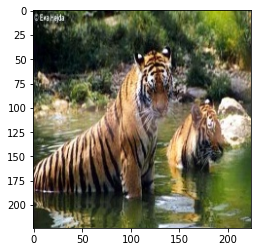

In [24]:
img = preprocess(urls[4][1])
img_tensor = torch.from_numpy(img)
img_tensor = img_tensor.unsqueeze_(0)
img_variable = Variable(img_tensor, requires_grad=True)

pre_image = deprocess(img_tensor)
cv2.imwrite("pre_processed.jpg", pre_image)
plt.figure()
plt.imshow(cv2.cvtColor(cv2.imread("pre_processed.jpg"),cv2.COLOR_BGR2RGB))
get_image_label("pre_processed.jpg")

## 1.C

In [25]:
def generate_adverserial(input_image,target_variable,iterations):
    optimizer = Adam([img_variable], lr=0.005)
    criteron = nn.CrossEntropyLoss()
    print("\nStarting Optimization...")
    for iteration in range(1,iterations):
        fc_out = model(input_image)
        fc_out = F.softmax(fc_out, dim=1)

        optimizer.zero_grad()
        loss = criteron(fc_out, target_variable)

        loss.backward(retain_graph = True)
    #     grads = torch.sign(img_variable.grad.data)
    #     print(img_variable.grad.data)
    #     optimizer.zero_grad()
        optimizer.step()
    #     epsilon = [0.0001, 0.001, 0.0013, 0.009, 0.015, 0.120, 0.25, 0.302] 
    #     for i in epsilon:
    #         img_variable = img_variable.data + i  

        if iteration == 1 or iteration%50 == 0:
            print("Current Iteration: ",iteration,"\tCurrent Cost: ", loss)      
    #         final_image = deprocess(img_variable)
    #         cv2.imwrite("temp.jpg", final_image)
    #         print(get_image_label("temp.jpg"))
    #         print(fc_out,target_variable)
    return input_image


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9094, grad_fn=<NllLossBackward>)
original: water snake
adverserial: bullfrog


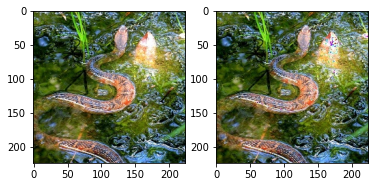


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9094, grad_fn=<NllLossBackward>)
original: water snake
adverserial: water snake


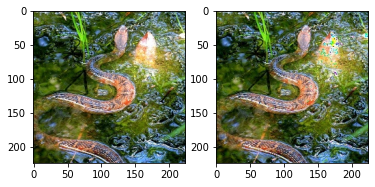


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9094, grad_fn=<NllLossBackward>)
original: water snake
adverserial: robin


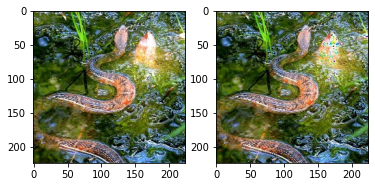


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9090, grad_fn=<NllLossBackward>)
original: agama
adverserial: tiger beetle


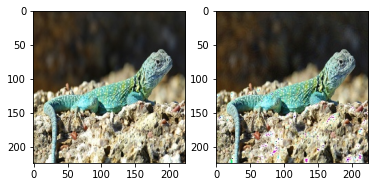


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9090, grad_fn=<NllLossBackward>)
original: agama
adverserial: brambling


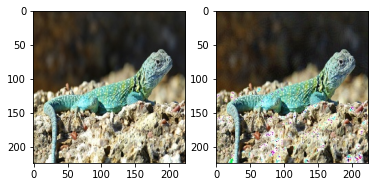


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9090, grad_fn=<NllLossBackward>)
original: agama
adverserial: robin


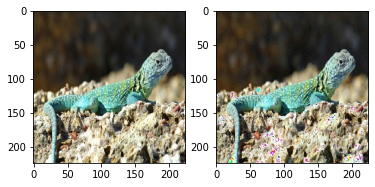


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9093, grad_fn=<NllLossBackward>)
original: scorpion
adverserial: electric ray


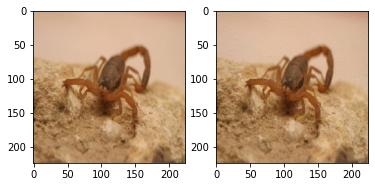


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9093, grad_fn=<NllLossBackward>)
original: scorpion
adverserial: barn spider


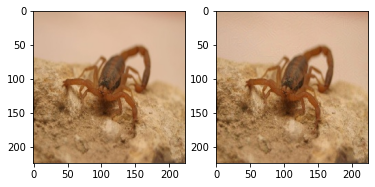


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9093, grad_fn=<NllLossBackward>)
original: scorpion
adverserial: barn spider


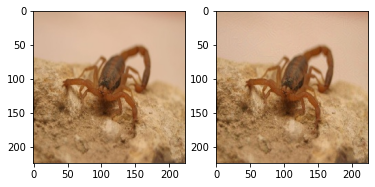


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9089, grad_fn=<NllLossBackward>)
original: lion
adverserial: Komodo dragon


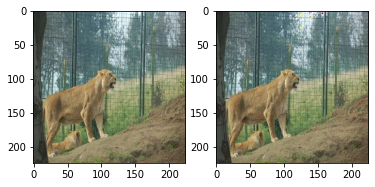


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9089, grad_fn=<NllLossBackward>)
original: lion
adverserial: brambling


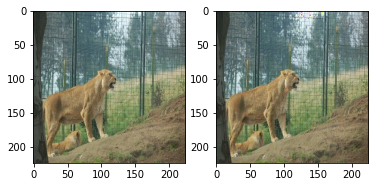


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9089, grad_fn=<NllLossBackward>)
original: lion
adverserial: robin


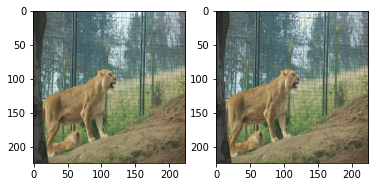


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9093, grad_fn=<NllLossBackward>)
original: tiger
adverserial: zebra


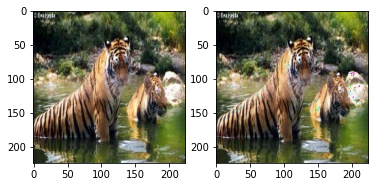


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9093, grad_fn=<NllLossBackward>)
original: tiger
adverserial: lionfish


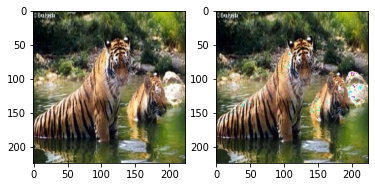


Starting Optimization...
Current Iteration:  1 	Current Cost:  tensor(6.9093, grad_fn=<NllLossBackward>)
original: tiger
adverserial: robin


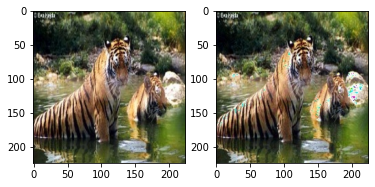

In [27]:
targets=[5,10,15]
for url in urls:    
    img = preprocess(url[1])
    img_tensor = torch.from_numpy(img)
    img_tensor = img_tensor.unsqueeze_(0)
    pre_image = deprocess(img_tensor)
    for target in targets:
        pre_processed="pre_processed"+url[1]+"-"+str(target)+".jpg"
        cv2.imwrite(pre_processed, pre_image)
        img = preprocess(url[1])
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.unsqueeze_(0)
        img_variable = Variable(img_tensor, requires_grad=True)
        target_vector = np.array([target], dtype=np.int64)
        target_tensor = torch.from_numpy(target_vector)
        target_variable = Variable(target_tensor)                          
        adv_image=generate_adverserial(img_variable,target_variable,30)
        final_image = deprocess(adv_image)
        advout="adverseial_"+url[1]+"-"+str(target)+".jpg"
        cv2.imwrite(advout, final_image)
        print("original:",get_image_label(pre_processed))
        print("adverserial:",get_image_label(advout))        
        f = plt.figure()
        f.add_subplot(1,2, 1)
        plt.imshow(cv2.cvtColor(cv2.imread(pre_processed),cv2.COLOR_BGR2RGB))
        f.add_subplot(1,2, 2)
        plt.imshow(cv2.cvtColor(cv2.imread(advout),cv2.COLOR_BGR2RGB))
        plt.show(block=True)


# 3.B
<img src="DL_Ass02_3.a.jpg"/>

In [190]:
import numpy as np
np.random.seed(0)
class RecurrentNetwork(object):
    """W_hh means a weight matrix that accepts a hidden state and produce a new hidden state.
    Similarly, W_xh represents a weight matrix that accepts an input vector and produce a new hidden state. 
    """
    def __init__(self):
        self.hidden_state = np.zeros((3, 3))
        self.hidden_state2 = np.zeros((3, 3))
        self.W_hh = np.random.randn(3, 3)
        self.W_xh = np.random.randn(3, 3)
        self.W_hy = np.random.randn(3, 3)
        self.Bh = np.random.randn(3,)
        self.By = np.random.rand(3,)

    def forward_prop(self, x):
        # The order of which you do dot product is entirely up to you. The gradient updates will take care itself
        # as long as the matrix dimension matches up.
        self.hidden_state = np.tanh(np.dot(self.hidden_state, self.W_hh) + np.dot(x, self.W_xh) + self.Bh)
#         print(self.W_hy.dot(self.hidden_state) + self.By)
        self.hidden_state2= np.tanh(np.dot(self.hidden_state2, self.W_hh)) + np.dot(x, self.W_xh) + self.Bh
#         print(self.W_hy.dot(self.hidden_state2) + self.By)
        return self.W_hy.dot(self.hidden_state) + self.By,self.W_hy.dot(self.hidden_state2) + self.By

input_vector = np.ones((3, 3))
RNN = RecurrentNetwork()

# Notice that same input, but leads to different ouptut at every single time step.
print(RNN.forward_prop(input_vector))
print(RNN.forward_prop(input_vector))
print(RNN.forward_prop(input_vector))

(array([[-1.73665315, -2.40366542, -2.72344361],
       [ 1.61591482,  1.45557046,  1.13262256],
       [ 1.68977504,  1.54059305,  1.21757531]]), array([[-3.13455948, -9.50547134, -9.42482   ],
       [ 1.96646911,  3.23649703,  2.81313303],
       [ 2.07884955,  3.51721453,  3.08274661]]))
(array([[-2.15023381, -2.41205828, -2.71701457],
       [ 1.71962883,  1.45767515,  1.13101034],
       [ 1.80488553,  1.542929  ,  1.21578594]]), array([[ -6.22857733, -12.5994636 ,  -6.39824394],
       [  2.74235888,   4.01238038,   2.0541557 ],
       [  2.93999702,   4.37835488,   2.24036999]]))
(array([[-2.15024751, -2.41207375, -2.720968  ],
       [ 1.71963227,  1.45767903,  1.13200175],
       [ 1.80488935,  1.54293331,  1.21688628]]), array([[ -6.22857733, -12.59948899,  -6.41337362],
       [  2.74235888,   4.01238675,   2.05794978],
       [  2.93999702,   4.37836194,   2.24458098]]))


## 3.C
https://mmuratarat.github.io/2019-02-07/bptt-of-rnn

In vanilla RNNs, vanishing/exploding gradient comes from the repeated application of the recurrent connections. which happen because of recursive derivative we need to compute 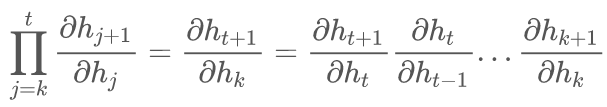
if we want to backpropagate through t-k  timesteps, this gradient will be:
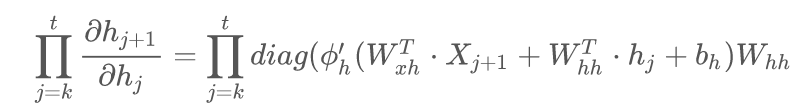

n this equation, we set , the largest eigenvalue associated with  as its upper bound, while  largest eigenvalue associated with  as its corresponding upper-bound.


## 3.D

gradient tends to vanish when Y<1 and tends to explode when Y>1.

## 4.B

Self attention sees its input as a set, not a sequence. If we  permute the input sequence, the output sequence will be exactly the same, except permuted also (i.e. self-attention is permutation equivariant). We will mitigate this somewhat when we build the full transformer, but the self-attention by itself actually ignores the sequential nature of the input.
http://peterbloem.nl/blog/transformers

In [79]:
from scipy.special import softmax
import itertools
import numpy as np
from copy import copy, deepcopy
T=5
D=5
p0=range(0,T)
permutations=list(itertools.permutations(p0))
X = np.random.randint(10,size=(T, D))
Wq=np.random.rand(D, D)
Wk=np.random.rand(D, D)
Wv=np.random.rand(D, D)
# print(X)
def s_x(x):   
    Q=x@Wq
    # print(Wq)
    K=x@Wk
    # print(Wk)
    V=x@Wv
    # print(X)
    alpha=2
    A=(Q@K.transpose())/alpha 
    s=softmax(A)@V
    return s

for p in permutations:
    psx=deepcopy(s_x(X))
    psx[p0]=psx[list(p)]
    px=deepcopy(X)
    px[p0]=px[list(p)]
    spx=s_x(px)    
    print('p:',p,'-> psx==spx:',np.allclose(psx,spx))
    


p: (0, 1, 2, 3, 4) -> psx==spx: True
p: (0, 1, 2, 4, 3) -> psx==spx: True
p: (0, 1, 3, 2, 4) -> psx==spx: True
p: (0, 1, 3, 4, 2) -> psx==spx: True
p: (0, 1, 4, 2, 3) -> psx==spx: True
p: (0, 1, 4, 3, 2) -> psx==spx: True
p: (0, 2, 1, 3, 4) -> psx==spx: True
p: (0, 2, 1, 4, 3) -> psx==spx: True
p: (0, 2, 3, 1, 4) -> psx==spx: True
p: (0, 2, 3, 4, 1) -> psx==spx: True
p: (0, 2, 4, 1, 3) -> psx==spx: True
p: (0, 2, 4, 3, 1) -> psx==spx: True
p: (0, 3, 1, 2, 4) -> psx==spx: True
p: (0, 3, 1, 4, 2) -> psx==spx: True
p: (0, 3, 2, 1, 4) -> psx==spx: True
p: (0, 3, 2, 4, 1) -> psx==spx: True
p: (0, 3, 4, 1, 2) -> psx==spx: True
p: (0, 3, 4, 2, 1) -> psx==spx: True
p: (0, 4, 1, 2, 3) -> psx==spx: True
p: (0, 4, 1, 3, 2) -> psx==spx: True
p: (0, 4, 2, 1, 3) -> psx==spx: True
p: (0, 4, 2, 3, 1) -> psx==spx: True
p: (0, 4, 3, 1, 2) -> psx==spx: True
p: (0, 4, 3, 2, 1) -> psx==spx: True
p: (1, 0, 2, 3, 4) -> psx==spx: True
p: (1, 0, 2, 4, 3) -> psx==spx: True
p: (1, 0, 3, 2, 4) -> psx==spx: True
p

## 4.C apply average function

In [194]:
from skimage.measure import block_reduce
print(X)
for p in permutations:
# p= permutations[2]
    px=deepcopy(X)
    px[p0]=px[list(p)]
    spx=s_x(px)
    sx=s_x(X)

    sx_mean=np.average(sx)
#     print(sx_mean)
#     spx_mean=block_reduce(spx, (3,3), np.mean)
    spx_mean=np.average(spx)
#     print(spx_mean)
    print('p:',p,'-> sx_avg==spx_avg:',np.allclose(sx_mean,spx_mean))

[[6 7 7 0 0]
 [1 4 5 1 0]
 [8 1 0 0 1]
 [6 6 9 5 6]
 [6 3 2 2 3]]
p: (0, 1, 2, 3, 4) -> sx_avg==spx_avg: True
p: (0, 1, 2, 4, 3) -> sx_avg==spx_avg: True
p: (0, 1, 3, 2, 4) -> sx_avg==spx_avg: True
p: (0, 1, 3, 4, 2) -> sx_avg==spx_avg: True
p: (0, 1, 4, 2, 3) -> sx_avg==spx_avg: True
p: (0, 1, 4, 3, 2) -> sx_avg==spx_avg: True
p: (0, 2, 1, 3, 4) -> sx_avg==spx_avg: True
p: (0, 2, 1, 4, 3) -> sx_avg==spx_avg: True
p: (0, 2, 3, 1, 4) -> sx_avg==spx_avg: True
p: (0, 2, 3, 4, 1) -> sx_avg==spx_avg: True
p: (0, 2, 4, 1, 3) -> sx_avg==spx_avg: True
p: (0, 2, 4, 3, 1) -> sx_avg==spx_avg: True
p: (0, 3, 1, 2, 4) -> sx_avg==spx_avg: True
p: (0, 3, 1, 4, 2) -> sx_avg==spx_avg: True
p: (0, 3, 2, 1, 4) -> sx_avg==spx_avg: True
p: (0, 3, 2, 4, 1) -> sx_avg==spx_avg: True
p: (0, 3, 4, 1, 2) -> sx_avg==spx_avg: True
p: (0, 3, 4, 2, 1) -> sx_avg==spx_avg: True
p: (0, 4, 1, 2, 3) -> sx_avg==spx_avg: True
p: (0, 4, 1, 3, 2) -> sx_avg==spx_avg: True
p: (0, 4, 2, 1, 3) -> sx_avg==spx_avg: True
p: (0, 4, 

## 4.D
The Positionwise Feedforward network brings in some non-linear to MultiHead Attension

In [171]:
class PositionwiseFeedForward(nn.Module):
    """
    Does a Linear + RELU + Linear on each of the timesteps
    """
    def __init__(self,B,T,D):
        """
        Parameters:
            input_depth: Size of last dimension of input
            filter_size:Hidden size of the middle layer
            output_depth: Size last dimension of the final output
        """
        input_depth, filter_size, output_depth=B,T,D
        super(PositionwiseFeedForward, self).__init__()
       
        
        self.layers = nn.ModuleList([
                      torch.nn.Linear(input_depth, filter_size), 
                      torch.nn.Linear(filter_size, filter_size), 
                      torch.nn.Linear(filter_size, output_depth)
                    ])
        self.relu = nn.ReLU()        
    def forward(self, inputs):
        x = inputs
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers):
                x = self.relu(x)
        return x

In [172]:
class PositionwiseFeedForward_Conv(nn.Module):
    """
    Does a Linear + RELU + Linear on each of the timesteps
    """
    def __init__(self,B,T,D):
        """
        Parameters:
            input_depth: Size of last dimension of input
            filter_size:Hidden size of the middle layer
            output_depth: Size last dimension of the final output
        """
        input_depth, filter_size, output_depth=B,T,D
        super(PositionwiseFeedForward_Conv, self).__init__()
       
        
        self.layers = nn.ModuleList([
                      torch.nn.Conv1d(input_depth, filter_size,1), 
                      torch.nn.Conv1d(filter_size, filter_size,1), 
                      torch.nn.Conv1d(filter_size, output_depth,1)
                    ])
        self.relu = nn.ReLU()        
    def forward(self, inputs):
        x = inputs
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers):
                x = self.relu(x)
        return x

In [177]:
Z=torch.randn([4,3,4])
permuted_tensor = Z.permute(0,2,1).clone().contiguous()
pwff_conv=PositionwiseFeedForward_Conv(Z.shape[0],Z.shape[1],Z.shape[2])
tensor_pwff_conv=pwff_conv.forward(permuted_tensor)

pwff=PositionwiseFeedForward(Z.shape[0],Z.shape[1],Z.shape[2])
for i in range(len(pwff_conv.layers)):
    pwff.layers[i].weight= torch.nn.Parameter(pwff_conv.layers[i].weight.squeeze(2))
    pwff.layers[i].bias = torch.nn.Parameter(pwff_conv.layers[i].bias)
tensor_pwff=pwff.forward(Z).permute(0,2,1).clone().contiguous()

print('pwff Linear out=',tensor_pwff.detach())
print('pwff_Conv1D Out=',tensor_pwff_conv.detach())
print( 'pwff_Linear==spwff_Conv1D:',np.allclose(tensor_pwff.detach(),tensor_pwff_conv.detach()))

pwff Linear out= tensor([[[0.1803, 0.2522, 0.1838],
         [0.0000, 0.0421, 0.0439],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0612, 0.0000]],

        [[0.1809, 0.1785, 0.2299],
         [0.0054, 0.0037, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0312]],

        [[0.2116, 0.2455, 0.1926],
         [0.0278, 0.0335, 0.1105],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0467, 0.0000]],

        [[0.1785, 0.2554, 0.2053],
         [0.0037, 0.0598, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0598, 0.0000]]])
pwff_Conv1D Out= tensor([[[0.1803, 0.2522, 0.1838],
         [0.0000, 0.0421, 0.0439],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0612, 0.0000]],

        [[0.1809, 0.1785, 0.2299],
         [0.0054, 0.0037, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0312]],

        [[0.2116, 0.2455, 0.1926],
         [0.0278, 0.0335, 0.1105],
         [0.0000, 0.0000, 0.0000],
         